In [ ]:
import xarray as xr 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Load model data

In [ ]:
model = 'IPSL-CM6A-LR'

ds_decomp = xr.open_dataset(f'/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/decompositions/{model}/decomp_DJF_region14.nc')
ds_terms = xr.open_dataset(f'/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/decompositions/{model}/terms_DJF_region14.nc')

ds_pr_ref = xr.open_dataset('/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/indices/ERA5/pr/historical/DJF_region14.nc').tp
ds_pr_hist = xr.open_dataset(f'/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/indices/{model}/pr/historical/member_r1i1p1f1_DJF_region14.nc').pr
ds_pr_futur = xr.open_dataset(f'/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/indices/{model}/pr/ssp370/member_r1i1p1f1_DJF_region14.nc').pr

ds_u_ref = xr.open_dataset('/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/indices/ERA5/u850/historical/DJF_region14.nc').u850_lag0_index_val1
ds_u_hist = xr.open_dataset(f'/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/indices/{model}/u850/historical/member_r1i1p1f1_DJF_region14.nc').u850_lag0_index_val1
ds_u_futur = xr.open_dataset(f'/Data/gfi/share/ModData/CMIP_EU_Precip_Precursors/indices/{model}/u850/ssp370/member_r1i1p1f1_DJF_region14.nc').u850_lag0_index_val1

# Plot the distribution of variables

## Plot precipitation distribution

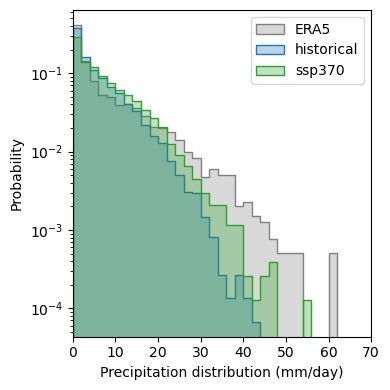

In [57]:
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(ds_pr_ref.to_series(), fill=True, stat='probability', element='step', bins=np.arange(0,100,2), label='ERA5', alpha=.3, color='.5')
sns.histplot(ds_pr_hist.to_series(), fill=True, stat='probability', element='step', bins=np.arange(0,100,2), label='historical', alpha=.3, color='C0')
sns.histplot(ds_pr_futur.to_series(), fill=True, stat='probability', element='step', bins=np.arange(0,100,2), label='ssp370', alpha=.3, color='C2')

ax.set_yscale('log')
ax.set_xlim(0,70)
ax.legend()
ax.set_xlabel('Precipitation distribution (mm/day)')

plt.tight_layout()

## Plot dynamical precursors distribution

Text(0.5, 0, 'Dynamical precursor occurence\n(normalized units)')

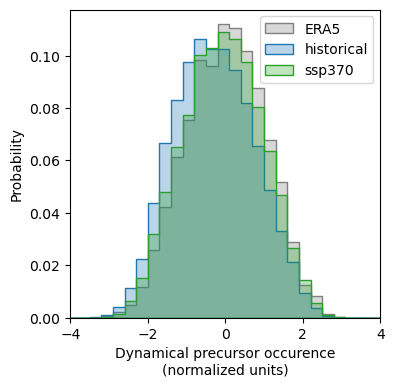

In [65]:
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(ds_u_ref.to_series(), fill=True, stat='probability', element='step', bins=np.arange(-5,5,.3), label='ERA5', alpha=.3, color='.5')
sns.histplot(ds_u_hist.to_series(), fill=True, stat='probability', element='step', bins=np.arange(-5,5,.3), label='historical', alpha=.3, color='C0')
sns.histplot(ds_u_futur.to_series(), fill=True, stat='probability', element='step', bins=np.arange(-5,5,.3), label='ssp370', alpha=.3, color='C2')

ax.set_xlim(-4,4)
ax.legend()
ax.set_xlabel('Dynamical precursor occurence\n(normalized units)')

# Plot the decomposition

ds_decomp gives the decomposition of changes in extreme rainfall occurence and in precursor occurrence.
dyn_ is probability of occurence of a given bin and therm_ is the probability of extreme rainfall in a given bin (.95 of all days for now)

<Axes: xlabel='synoptic_bin', ylabel='statistic'>

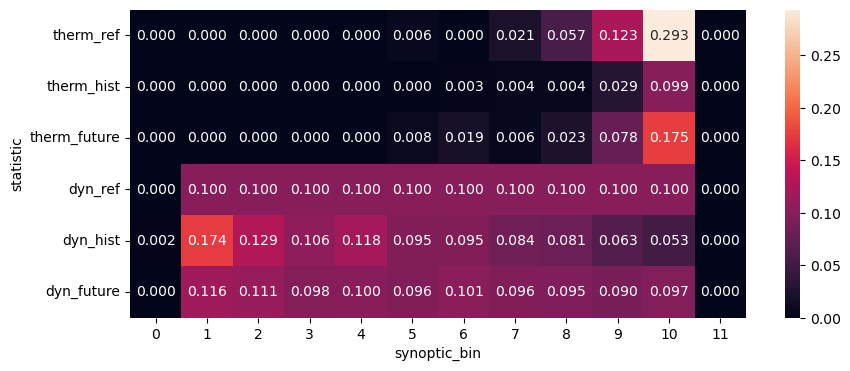

In [ ]:
fig, axs = plt.subplots(figsize=(10,4),)
sns.heatmap(ds_decomp.decomposition.to_series().unstack(), annot=True, fmt='.03f', square=True)

In [76]:
ds_terms.multiplicative_trend

<xarray.DataArray 'multiplicative_trend' (term: 4)> Size: 32B
array([     nan,      nan, 2.681299, 1.696025])
Coordinates:
  * term     (term) <U14 224B 'bias' 'ref' 'spurious_trend' 'trend'

# Plot the bias terms

ds_terms.individual_terms gives the absolute changes in extreme rainfall probability for different terms
ds_terms.multiplicative_trend terms gives the relative changes in extreme rainfall probability for different terms


## Only the bias
For individual terms divide by 0.05 because it is an absolute change in extreme rainfall occurence, not relative. For a 2d plot, you can sum dyn and nonlinear terms

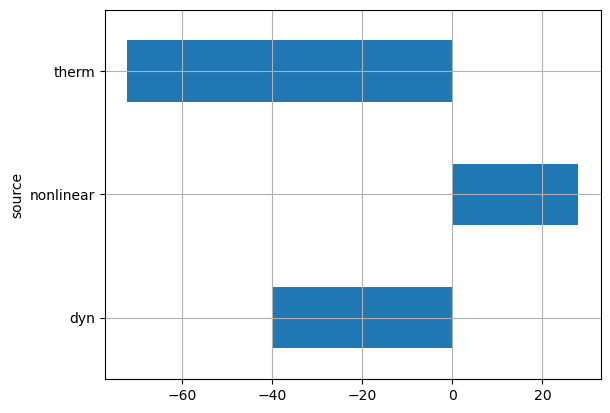

In [73]:
(ds_terms.sel(term='bias').individual_term.sum('synoptic_bin')/0.05*100).to_series().plot.barh()
plt.grid()

## Trends

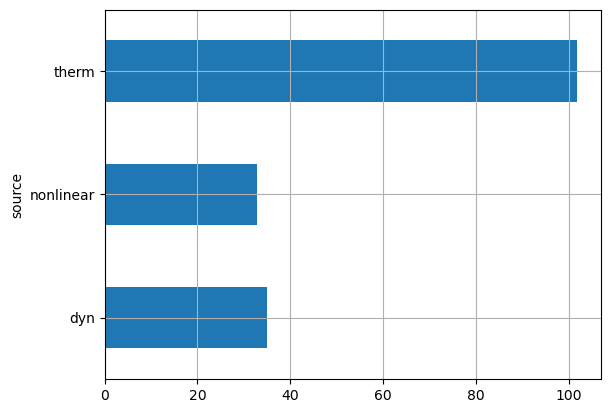

In [79]:
(ds_terms.sel(term='trend').individual_term.sum('synoptic_bin')/0.05*100).to_series().plot.barh()
plt.grid()

## Compare trend if computed in a direct way vs based on josh's decomposition 

In [29]:
ds_terms.multiplicative_trend.dropna('term')

<xarray.DataArray 'multiplicative_trend' (term: 2)> Size: 16B
array([2.681299, 1.696025])
Coordinates:
  * term     (term) <U14 112B 'spurious_trend' 'trend'